In [1]:
# reload modules if needed
%load_ext autoreload
%autoreload 2

In [2]:
import json
import os
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr
from notebook_utils import get_distribution_over_decoded_vocabulary, get_distribution_over_vocabulary, corpus_sizes

from collections import defaultdict, OrderedDict

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
FIGURE_DIR = "/home/limisiewicz/my-luster/entangled-in-scripts/output/figures"
TABLE_DIR =  "/home/limisiewicz/my-luster/entangled-in-scripts/output/tables"

In [5]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 26
plt.rcParams['axes.labelsize'] = 22
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16


## Parameteres

In [6]:
name_map = {
    'multilingual': 'Unigram',
    'bpe': 'BPE',
    'merged': 'TokMix',
    'nooverlap': 'NoOverlap'
}

In [7]:
languages = ('ar', 'tr', 'zh','el', 'es', 'en')
alpha = 0.25
tokenization_types = ('multilingual', 'bpe', 'merged', 'nooverlap')
N_vocab = 120000


ft_type = 'PROBE'

# Tokenizers and Distributions over Vocabulary

In [8]:
vocab_distributions = dict()
vocab_dist_arrays = dict()
vocab_frequencies = dict()

for tok_type in tokenization_types:
    vocab_distributions[tok_type], vocab_frequencies[tok_type] \
        = get_distribution_over_decoded_vocabulary(tok_type, alpha, N_vocab, languages)
#     vocab_dist_arrays[tok_type] = {lang: np.array(list(vocab_distributions[tok_type][lang].values()))
#                                    for lang in languages}

## Tail of BPE 

6214 vocabulary entries with end of line symbol!

In [9]:
[(t, p) for t, p in vocab_distributions['bpe']['All'].items()][-6214:]

[('ËÆ∞„ÄÇ\n', 0.0),
 ('melisiniz.\n', 0.0),
 ('‚ñÅshort.\n', 0.0),
 ('‚ñÅparticipant', 0.0),
 ('Œ±œÇ.\n', 0.0),
 ('‚ñÅcomposition', 0.0),
 ('ÂåªÈô¢„ÄÇ\n', 0.0),
 ('Ë¥üË¥£„ÄÇ\n', 0.0),
 ('Èó®„ÄÇ\n', 0.0),
 ('‚ñÅ?\n', 0.0),
 ('‚ñÅmiyiz?\n', 0.0),
 ('‚ñÅË¥ß‰∫§ÊâøËøê', 0.0),
 ('‚ñÅacquire', 0.0),
 ('30%„ÄÇ\n', 0.0),
 ('\x08\x07\x07\x08„ÄÇ\n', 0.0),
 ('Â±ÄÈù¢„ÄÇ\n', 0.0),
 ('‚ñÅ2004.\n', 0.0),
 ('‚ñÅcosts.\n', 0.0),
 ('‚ñÅThanks.\n', 0.0),
 ('\x06\x08„ÄÇ\n', 0.0),
 ('ÂΩ¢Âºè„ÄÇ\n', 0.0),
 ('Ê∏Ø„ÄÇ\n', 0.0),
 ('Âø´‰πê!\n', 0.0),
 ('emos.\n', 0.0),
 ('‚ñÅstrategy,', 0.0),
 ('‚ñÅqualifications', 0.0),
 ('ÊØç„ÄÇ\n', 0.0),
 ('‚ñÅvess', 0.0),
 ('‚ñÅmente.\n', 0.0),
 ('ÁöÑÊÉÖÂÜµ„ÄÇ\n', 0.0),
 ('‚ñÅa√ßƒ±ldƒ±.\n', 0.0),
 ('‚ñÅUSA.\n', 0.0),
 ('‚ñÅ1.-\n', 0.0),
 ('‚ñÅlocales.\n', 0.0),
 ('eceƒüim.\n', 0.0),
 ('‚ñÅd√º≈üt√º.\n', 0.0),
 ('‚ñÅgobierno.\n', 0.0),
 ('‚ñÅ17.\n', 0.0),
 ('‚ñÅtransact', 0.0),
 ('‚ñÅgrown', 0.0),
 ('‚ñÅsells', 0.0),
 ('‚ñÅ1).\n', 0.0),
 ('‚ñÅy...\n', 0.0),
 ('est.\n', 0.0),
 ('

For comparision tail of Unigram

In [10]:
[(t, p) for t, p in vocab_distributions['multilingual']['All'].items()][-2000:]

[('Õ•', 1.3509495077690505e-08),
 ('üëÖ', 1.3509495077690505e-08),
 ('Êö∏', 1.3509495077690505e-08),
 ('Èí≠', 1.3509495077690505e-08),
 ('\uf034', 1.3509495077690505e-08),
 ('\ue24c', 1.3509495077690505e-08),
 ('ÁèΩ', 1.3509495077690505e-08),
 ('·ûÅ', 1.3509495077690505e-08),
 ('Ëß∏', 1.3509495077690505e-08),
 ('«ç', 1.3509495077690505e-08),
 ('\uf607', 1.3509495077690505e-08),
 ('È≥ä', 1.3509495077690505e-08),
 ('‚èπ', 1.3509495077690505e-08),
 ('Ëèñ', 1.3509495077690505e-08),
 ('Ááö', 1.3509495077690505e-08),
 ('Ë°§', 1.3509495077690505e-08),
 ('üëï', 1.3509495077690505e-08),
 ('Ëè∞', 1.3509495077690505e-08),
 ('„Å¢', 1.3509495077690505e-08),
 ('‚ªì', 1.3509495077690505e-08),
 ('Ëöµ', 1.3509495077690505e-08),
 ('Â≤à', 1.3509495077690505e-08),
 ('‚ï´', 1.3509495077690505e-08),
 ('Ë°ø', 1.3509495077690505e-08),
 ('Áò©', 1.3509495077690505e-08),
 ('‚îû', 1.3509495077690505e-08),
 ('ÈÇ¥', 1.3509495077690505e-08),
 ('ÊÄô', 1.3509495077690505e-08),
 ('ÊÜß', 1.3509495077690505e-08),
 ('ü

# Comparision BPE vs. Unigram

In [14]:
tokenization_types_2 = ('bpe', 'multilingual')

## Identifying the most distinctful token by language

In [15]:
def find_most_over_underrepresented(average_distribution, analyzed_distribution, n=20):
    differences = dict()
    for lang in languages:
        differences[lang] = dict()
        for tok, p in average_distribution[lang].items():
            if tok in analyzed_distribution[lang]:
                differences[lang][tok] = analyzed_distribution[lang][tok] - average_distribution[lang][tok]
            else:
                differences[lang][tok] = - average_distributions[lang][tok]
        
        sorted_differences = sorted(differences[lang].items(), key=lambda x:x[1])
        print(f"Most underrepresented tokens for {lang}:")
        for t_p in sorted_differences[:n]:
            print(t_p)
        print(f"Most overrepresented tokens for {lang}:")
        for t_p in sorted_differences[-n:]:
            print(t_p)
        
    return differences
        
        
        

In [16]:
average_distributions = dict()
for lang in languages:
    average_distributions[lang] = defaultdict(float)
    for tokenization in tokenization_types_2:
        for tok, prob in vocab_distributions[tokenization][lang].items():
            average_distributions[lang][tok] += prob / 2

most over / under represented tokens by tokenizer

In [17]:
differences = dict()

In [18]:
tokenization = 'multilingual'
differences[tokenization] = find_most_over_underrepresented(average_distributions, vocab_distributions[tokenization])

Most underrepresented tokens for ar:
('<s>', -0.002405921148421721)
('</s>', -0.002405921148421721)
('‚ñÅÿå', -0.0018352335014448174)
('‚ñÅ.', -0.001258276468397861)
('‚ñÅŸÅŸä', -0.0012354244376510115)
('‚ñÅŸÖŸÜ', -0.001017991847601176)
('‚ñÅ:', -0.0007425417855263419)
('‚ñÅÿπŸÑŸâ', -0.0006385304205470642)
('..', -0.0005799807285812934)
('‚ñÅŸÅŸâ', -0.0005573179808635399)
('‚ñÅŸÉ', -0.0004989397007451523)
('‚ñÅŸÜ', -0.0004955268166766928)
('‚ñÅÿ≠ÿ™Ÿâ', -0.0004413697352745578)
('‚ñÅ...', -0.00042361675060265846)
('‚ñÅÿ≠Ÿäÿ´', -0.0004197548028409805)
('ÿ≥', -0.00040017414991045085)
('‚ñÅÿπ', -0.00039882843473700464)
('Ÿäÿ©ÿå', -0.00039370567860007555)
('‚ñÅ,', -0.00038137482586058415)
('‚ñÅŸÇ', -0.0003585324526655433)
Most overrepresented tokens for ar:
('‚ñÅŸÖ', 0.0005647621347024249)
('‚ñÅÿß', 0.0005958536577990877)
('‚ñÅÿ®ÿßŸÑ', 0.0006159561349955885)
('‚ñÅÿ£', 0.0007944509503690054)
('ÿ™', 0.0008544613092257673)
('Ÿá', 0.000962623193761801)
('ÿß', 0.0011406622872612393)
(':', 0.00118

In [19]:
tokenization = 'bpe'
differences[tokenization] = find_most_over_underrepresented(average_distributions, vocab_distributions[tokenization])

Most underrepresented tokens for ar:
('‚ñÅ', -0.05836992906133679)
('‚ñÅÿßŸÑ', -0.010271809113664638)
('‚ñÅŸà', -0.007155079930205958)
('ÿå', -0.004975309117558386)
('ÿ©', -0.0044634823598443864)
('‚ñÅÿ®', -0.004026893326729008)
('‚ñÅŸÑŸÑ', -0.0020215164035359634)
('‚ñÅŸä', -0.001993271413893843)
('‚ñÅÿ™', -0.0017374593020728977)
('‚ñÅŸàÿßŸÑ', -0.001676614100246552)
('‚ñÅŸÑ', -0.00166322883837346)
('Ÿä', -0.0012749477992045257)
(':', -0.0011829514988593369)
('ÿß', -0.0011406622872612389)
('Ÿá', -0.000962623193761801)
('ÿ™', -0.0008544613092257675)
('‚ñÅÿ£', -0.0007944509503690053)
('‚ñÅÿ®ÿßŸÑ', -0.0006159561349955885)
('‚ñÅÿß', -0.0005958536577990876)
('‚ñÅŸÖ', -0.0005647621347024247)
Most overrepresented tokens for ar:
('‚ñÅŸÇ', 0.0003585324526655433)
('‚ñÅ,', 0.00038137482586058415)
('Ÿäÿ©ÿå', 0.0003937056786000756)
('‚ñÅÿπ', 0.00039882843473700464)
('ÿ≥', 0.0004001741499104508)
('‚ñÅÿ≠Ÿäÿ´', 0.0004197548028409805)
('‚ñÅ...', 0.00042361675060265846)
('‚ñÅÿ≠ÿ™Ÿâ', 0.000441369735274557

# How language quality changes with prunes / merges

In [16]:
def compute_rank_average(probabilites):
    sorted_probabilities = np.sort(probabilites)[::-1]
    r_e = np.sum(sorted_probabilities * np.arange(len(probabilites)))
    return r_e

In [17]:
vocab_ns = (30000, 60000, 120000,240000, 500000, 750000)
vocab_dist_arrays = dict()
vocab_token_counts = dict()

for tok_type in tokenization_types_2:
    vocab_dist_arrays[tok_type] = dict()
    vocab_token_counts[tok_type] = dict()
    for nv in vocab_ns:
        vocab_distributions, vocab_frequencies \
            = get_distribution_over_vocabulary(tok_type, alpha, nv, languages)
        vocab_dist_arrays[tok_type][nv] = {lang: np.array(list(vocab_distributions[lang].values()))
                                       for lang in languages + ('All',)}
        vocab_token_counts[tok_type][nv] = {lang: np.sum(list(vocab_frequencies[lang].values()))
                                           for lang in languages + ('All',)}

compute average ranks

In [19]:
vocab_avg_rank = dict()
for tok_type in tokenization_types_2:
    vocab_avg_rank[tok_type] = dict()
    for lang in languages + ('All',):
        vocab_avg_rank[tok_type][lang] = [ compute_rank_average(vocab_dist_arrays[tok_type][nv][lang])
                                          for nv in vocab_ns ]  
        
vocab_avg_rank

{'bpe': {'ar': [828.7970474712891,
   1617.3689188604303,
   2971.967712739583,
   5102.831584296415,
   8524.846195627744,
   10924.921506480589],
  'tr': [1075.6436990266338,
   1877.9164792667236,
   3226.3344857529905,
   5464.213203918327,
   9351.863860455069,
   12319.485571501018],
  'zh': [1310.1947832795777,
   2306.0554566065193,
   4293.898618678605,
   8429.323330769512,
   17834.30124412447,
   27560.157148868755],
  'el': [877.9081431142345,
   1621.558167229729,
   2907.3730623727884,
   4975.974799628131,
   8139.83411879602,
   10295.878549202338],
  'es': [904.6212766638558,
   1445.8819740513545,
   2219.9355836283835,
   3255.070073336418,
   4605.239877975169,
   5440.953976822492],
  'en': [972.9428664636349,
   1475.14189894153,
   2142.562767766881,
   2976.762503323726,
   4053.860368571463,
   4722.474184530275],
  'All': [4044.8852730793433,
   7325.445925493661,
   13160.26269409849,
   23364.47214520144,
   42023.13621320811,
   57630.29022548959]},
 'mult

compute Characters per Token

In [20]:
vocab_cpt = dict()
for tok_type in tokenization_types_2:
    vocab_cpt[tok_type] = dict()
    all_corpora_size = 0
    for lang in languages:
        vocab_cpt[tok_type][lang] = [corpus_sizes[lang][f"alpha{alpha}"] / vocab_token_counts[tok_type][nv][lang]
                                    for nv in vocab_ns]
        all_corpora_size += corpus_sizes[lang][f"alpha{alpha}"]
    
    vocab_cpt[tok_type]['All'] = [all_corpora_size / vocab_token_counts[tok_type][nv]['All']
                                    for nv in vocab_ns]

vocab_cpt

{'bpe': {'ar': [2.927291479507112,
   3.3227369567116734,
   3.7002848321193347,
   4.042251602167354,
   4.354303933514711,
   4.494699091532583],
  'tr': [3.306510647873844,
   3.7527555883115387,
   4.191603485704903,
   4.615349802066467,
   5.028382288865917,
   5.231351438380394],
  'zh': [1.7054845315272193,
   1.8624458765270127,
   2.029995619196954,
   2.206565861881811,
   2.4118928467380534,
   2.5391892608358524],
  'el': [3.1332729940203192,
   3.5566857558084823,
   3.9747417932870475,
   4.361189119608904,
   4.708201637989684,
   4.860627147321903],
  'es': [3.658535959371958,
   4.023523241235365,
   4.338458654101664,
   4.594073738633769,
   4.797574189834136,
   4.8829107279977695],
  'en': [3.7085092291419763,
   3.991103503151843,
   4.224640332475039,
   4.408148122159613,
   4.556508152097288,
   4.621163984087287],
  'All': [3.6506566043897943,
   4.064707475353889,
   4.470879252373722,
   4.857461452555276,
   5.24126118257639,
   5.440618764713828]},
 'mult

## Plots

In [87]:
def plot_results(data, x_values):
    tokenizer_types = ('multilingual','bpe')
    colors= ["C1", "C2", "C3", "C4", "C5","C6"]
    markers=['.', 'v', '.', 'X']
    styles=['-', '--', '', '']

    for tt_idx, tok_type in enumerate(tokenizer_types): 
        for lang_idx, lang in enumerate(languages):
            axes.plot(x_values, data[tok_type][lang], color=colors[lang_idx],
                      marker=markers[tt_idx], ls=styles[tt_idx], alpha=0.6)


    dummy_lines = []
    for m_idx in range(len(markers)):
        dummy_lines.append(axes.plot([],[], c="black", ls=styles[m_idx], marker = markers[m_idx], alpha=0.6)[0])
    lines = axes.get_lines()
    legend1 = axes.legend([lines[i] for i in range(len(colors))], languages, loc='lower right', ncol=3)
    legend2 = axes.legend([dummy_lines[i] for i in range(len(markers))], [name_map[tt] for tt in tokenizer_types],
                          loc='upper left', ncol=6)

    axes.add_artist(legend1)
    axes.set_xlabel('Vocabulary Size')
    
    plt.ticklabel_format(axis='x', style='sci', scilimits=(-3, 3),
                       useOffset=True)
    #axes.set_yscale('log')
    #axes.set_ylabel(ylabel)
    

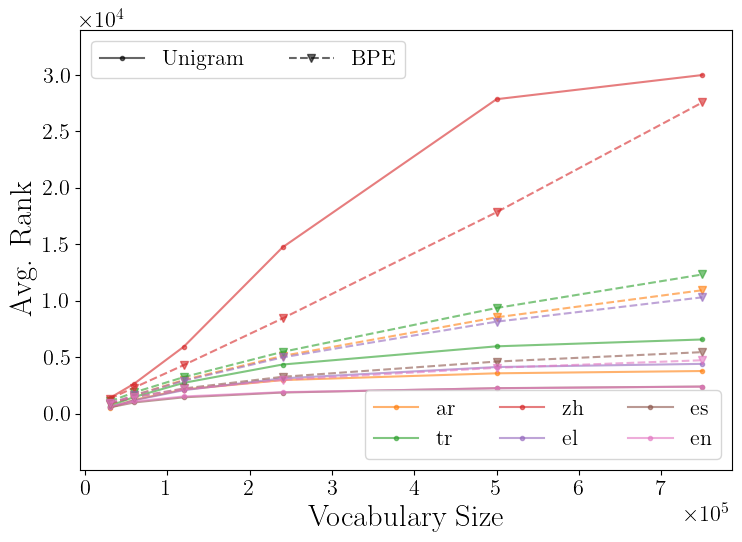

In [90]:
fig, axes = plt.subplots(figsize=(8,6))
plot_results(vocab_avg_rank, vocab_ns)
#axes.set_yscale('log')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3),
                   useOffset=True)
axes.set_ylim([-4999, 34000])
axes.set_ylabel('Avg. Rank')

plt.tight_layout()
plt.savefig(os.path.join(FIGURE_DIR, "AR_x_vocabulary.pdf"), dpi=300)
plt.show()

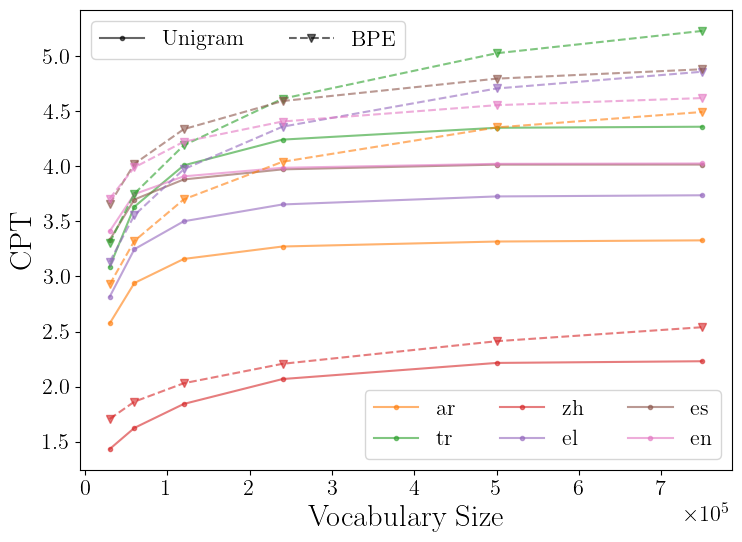

In [91]:
fig, axes = plt.subplots(figsize=(8, 6))
plot_results(vocab_cpt, vocab_ns)
axes.set_ylabel('CPT')

plt.tight_layout()
plt.savefig(os.path.join(FIGURE_DIR, "CPT_x_vocabulary.pdf"), dpi=300)
plt.show()